# 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('train.csv')

# 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

不動産の売却価格が予測するターゲット変数。  
特徴量は各種の住宅に関する情報。  
特徴量である説明変数の数は７９。  
一列目にはIDがある。

# 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

* 各特徴量がどういったものかを見る。（数値データか文字データなど）
* 今回の目的変数はどの列か確認する。
* 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [18]:
df.shape

(1460, 81)

In [19]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

* 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [21]:
# 全列毎の型を確認
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [22]:
# 整数型 number
print(df.dtypes[df.dtypes == int].value_counts())
print(len(df.select_dtypes(include=int).columns))

int64    35
dtype: int64
35


In [23]:
# 整数型 dataframe
df.select_dtypes(include=int).head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
# 浮動小数点数 number
print(df.dtypes[df.dtypes == float].value_counts())
print(len(df.select_dtypes(include=float).columns))

float64    3
dtype: int64
3


In [25]:
# 浮動小数点数 dataframe
df.select_dtypes(include=float).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [26]:
# 文字 number
print(df.dtypes[df.dtypes == object].value_counts())
print(len(df.select_dtypes(include=object).columns))

object    43
dtype: int64
43


In [27]:
# 文字 dataframe
df.select_dtypes(include=object).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


* 今回の目的変数はどの列か確認する。

In [28]:
# 今回の目的変数はどの列か確認する。
# SalePriceの列を確認
print('SalePriceの列番号は{}'.format(df.columns.get_loc('SalePrice')))

SalePriceの列番号は80


* 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [29]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。
* 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。  
ResidentMario/missingno: Missing data visualization module for Python.
* 欠損値が何パーセント含まれるかを確認する。
* 5つ以上欠損値がある特徴量（列）は削除する。
* 欠損値があるサンプル（行）は削除する。

In [30]:
# pipを最新の状態に更新
#pip install --upgrade setuptools
#pip install --upgrade pip
pip install missingno

SyntaxError: invalid syntax (<ipython-input-30-628a0bb96413>, line 4)

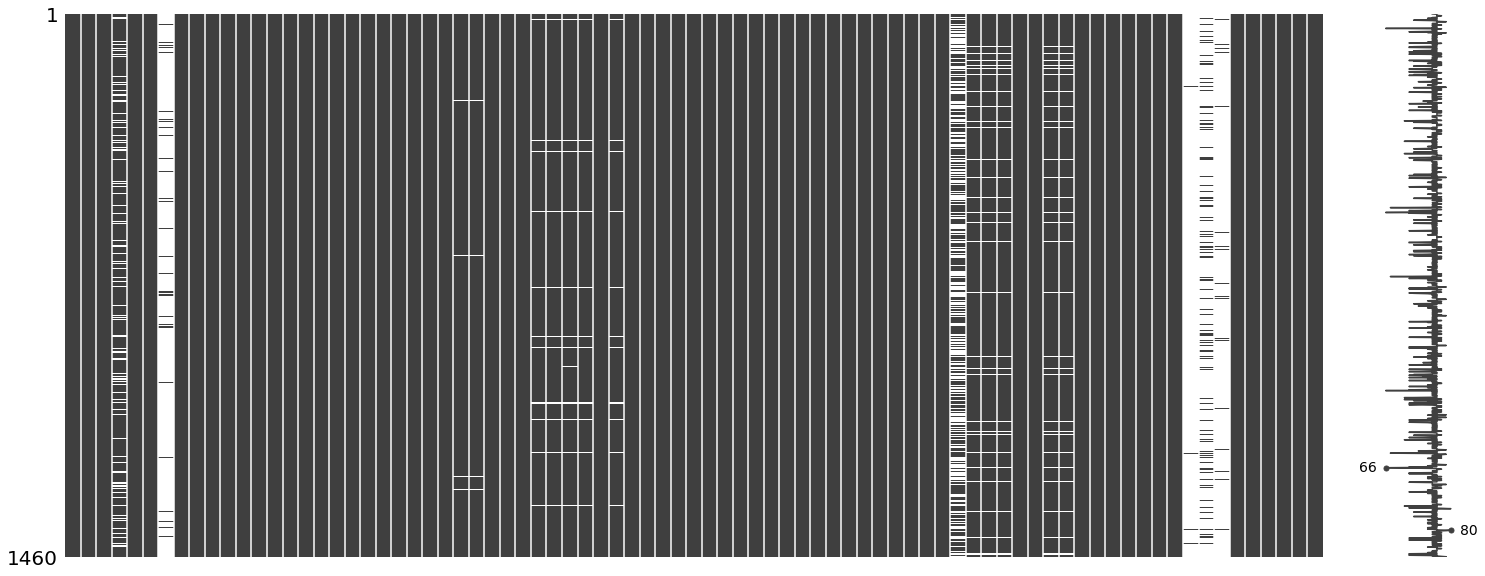

In [31]:
# 各特徴量の欠損値の有無を確認する。

# missingno
import missingno as msno
# 欠損値のマトリックス
msno.matrix(df)
plt.show()

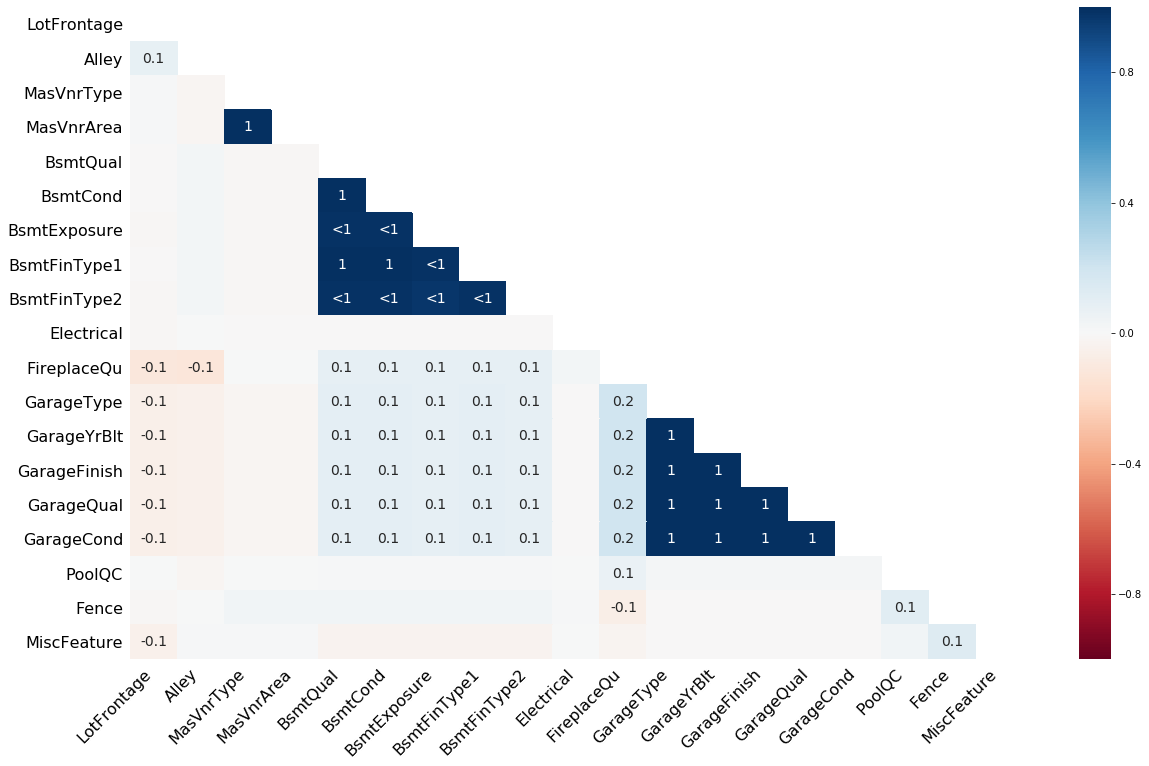

In [32]:
# 各列の欠損値の発生箇所についての相関
msno.heatmap(df)
plt.show()

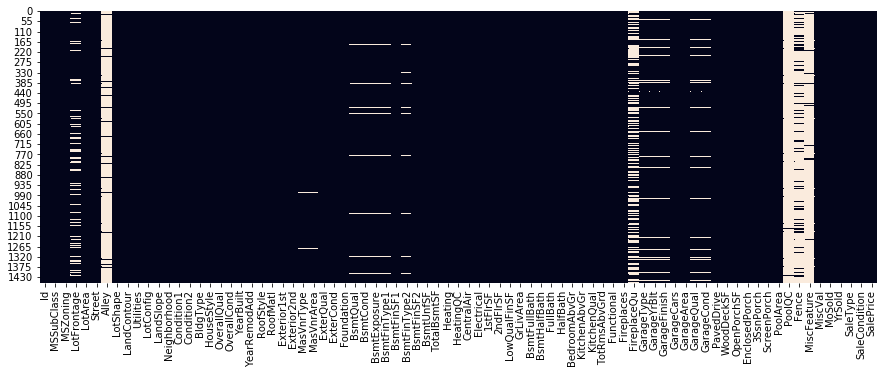

In [33]:
# 各特徴量の欠損値の有無を確認する。
# その他の可視化方法

# seabornのヒートマップ
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [34]:
# 各特徴量の欠損値の有無を確認する。
# その他の可視化方法

# 欠損値がある行を確認
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [35]:
# 欠損値が何パーセント含まれるかを確認する。
df_null = pd.concat([df.isnull().sum(), df.isnull().sum() / len(df)],
                    axis=1).rename(columns={0:"Total", 1:"missing_ratio"})
df_null.head()

,Total,missing_ratio
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,0.177397
LotArea,0,0.000000


In [64]:
(df.isnull().sum(1) > 0).sum()

1460

In [36]:
# 5つ以上欠損値がある特徴量（列）は削除する。
df.dropna(axis=1, thresh=df.shape[0] - 4).head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [37]:
# 欠損値があるサンプル（行）は削除する。
df.dropna(axis=0)

# 全てのサンプル(行)に欠損値がある

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [38]:
# 欠損値が１つ以下のサンプル（行）
df.dropna(axis=0, thresh=df.shape[1] - 1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000


# 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

* 尖度
* 歪度

尖度  
分布が正規分布からどれだけ尖っているかを表す統計量。
山の尖り度と裾野の広がり度を示す。

歪度  
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。

# 【問題6】分布の確認
* seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
* 目的変数に対して対数変換を行う。
* 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

seaborn.distplot — seaborn 0.9.0 documentation

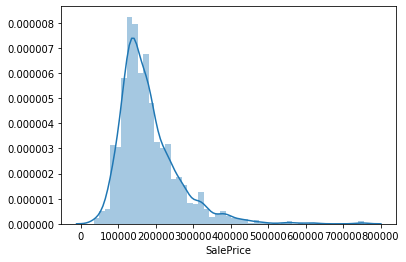

In [39]:
# seabornのsns.distplot()を使い目的変数の分布を表示し、
sns.distplot(df.iloc[:, -1])
plt.show()

In [40]:
#「尖度」と「歪度」も算出する。

# 尖度(Kurtosis)、歪度(Skewness)
print("尖度 :", df.iloc[:, -1].kurt())
print("歪度 :", df.iloc[:, -1].skew())

尖度 : 6.536281860064529
歪度 : 1.8828757597682129


In [41]:
# 目的変数に対して対数変換を行う。

# 自然対数eを底とする対数
target_e = np.log(df.iloc[:, -1])
target_e.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

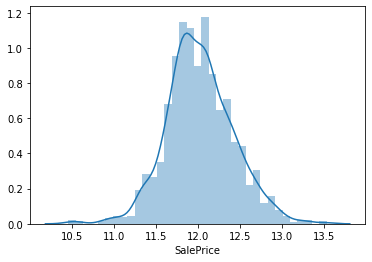

In [42]:
# 対数変換したものに対して分布を表示
sns.distplot(target_e)
plt.show()

In [43]:
#「尖度」と「歪度」も算出する。

# 尖度(Kurtosis)、歪度(Skewness)
print("尖度 :", target_e.kurt())
print("歪度 :", target_e.skew())

尖度 : 0.8095319958036296
歪度 : 0.12133506220520406


# 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

* 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
* 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
* 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
* 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》  
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

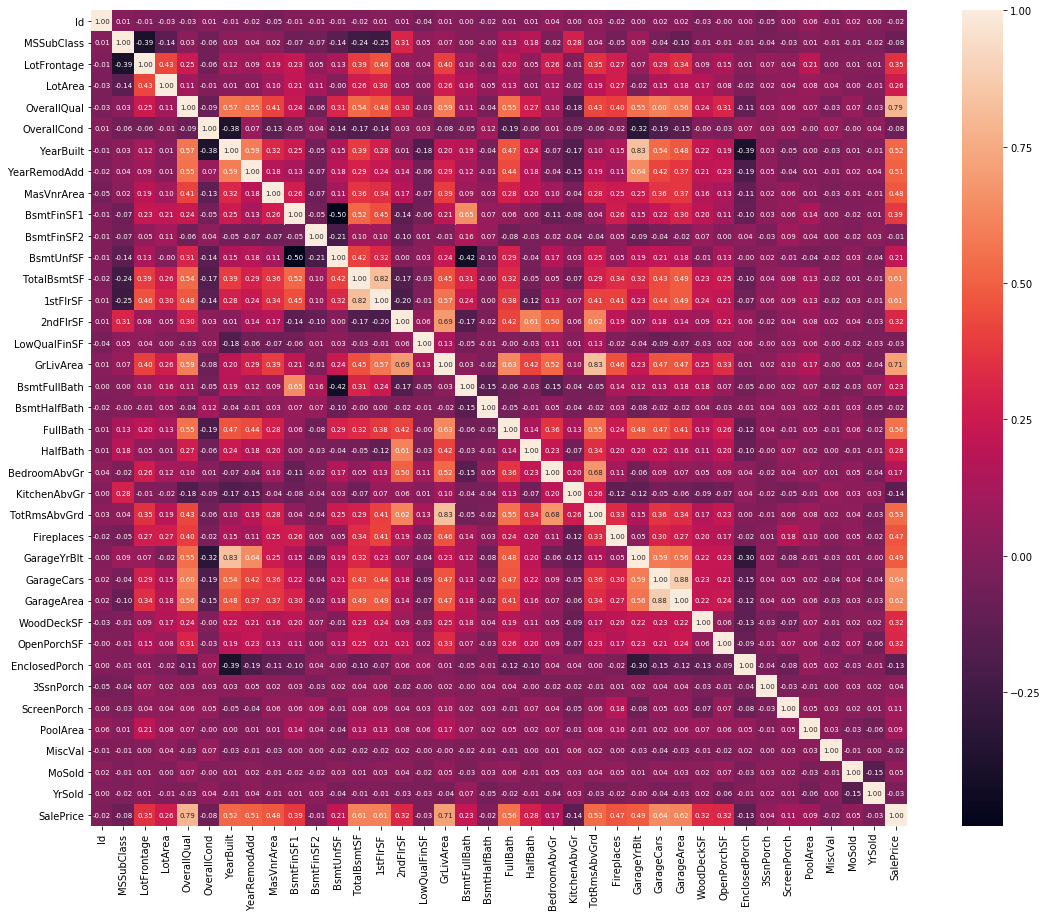

In [44]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

# 特徴量に関する相関係数行列を作る
df_corr = df.corr(method='pearson')
# ヒートマップ化
plt.figure(figsize=(20, 15))
sns.heatmap(df_corr, cbar=True, annot=True, square=True,
            fmt='.2f', annot_kws={'size':7})
plt.show()

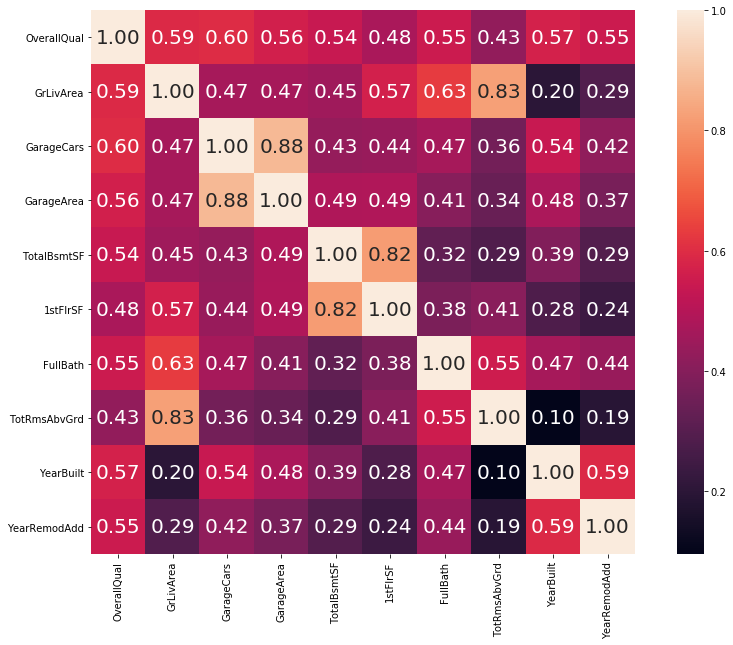

In [45]:
# 目的変数との相関の高い特徴量10個を選び、
# これらだけの相関係数行列ヒートマップを作る。

# 目的変数との相関係数が高い上位10個を抽出(降順)
# 行→列の順でソート、降順
df_corr_rsort = df_corr.sort_values(df.columns[-1], axis=1, ascending=False)
df_corr_sort = df_corr_rsort.sort_values(df.columns[-1], ascending=False)
# ヒートマップ化
plt.figure(figsize=(15,10))
sns.heatmap(df_corr_sort.iloc[1:11, 1:11],
            cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size':20})
plt.show()

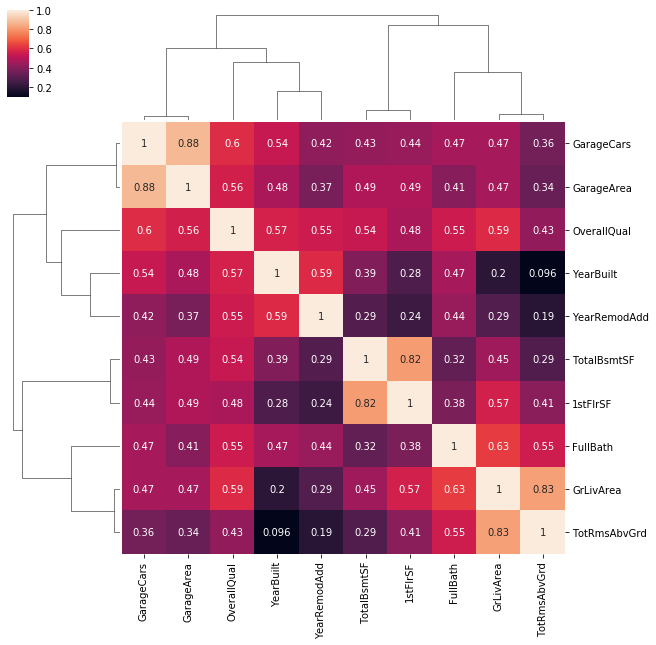

In [46]:
# その他ヒートマップ
# 変数間をクラスタリング
cg = sns.clustermap(df_corr_sort.iloc[1:11, 1:11], annot=True, metric="correlation")
#plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show() 

In [47]:
df_corr_sort.iloc[1:11, 1:11]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000


選んだ10個の特徴量が何か表しているかを
KaggleのDataDescriptionの記述を参考に日本語でまとめる。

* OverallQual：全体的な材料と仕上げの品質
* GrLivArea：地上リビングエリアの平方フィート
* GarageCars：車の容量におけるガレージのサイズ
* GarageArea：平方フィート単位のガレージのサイズ
* TotalBsmtSF：地下室の総平方フィート
* 1stFlrSF：1階平方フィート
* FullBath：グレード以上のフルバスルーム
* TotRmsAbvGrd：グレードを超える客室の合計（バスルームは含まれません）
* YearBuilt：元の建設日
* YearRemodAdd：リフォーム日

In [48]:
# 選んだ10個の特徴量の中で
# お互いの相関係数が高い組み合わせを3つ探し出す。

# 選んだ１０個の特徴量の相関行列の値を１次元化
df_corr_10f1di = df_corr_sort.iloc[1:11, 1:11].values.flatten()
# ソートした中から、高値を3つ抽出（重複は全て削除される）
# sortedではなくlistを使用するとソートが解除されてしまう
corr_top = sorted(set(df_corr_10f1di))[-4:-1]
# 相関行列で値が「高値３つ」以外の場所をNaNにする
X = df_corr_sort.iloc[1:11, 1:11][df_corr_sort.
                                  iloc[1:11, 1:11].isin(corr_top)]
# 数値（「高値３つ」）の行列番号を抽出
indices = np.where(X < 1)
# NaN以外の数値の行列の組み合わせを抽出
indices_name = [[X.index[x], X.columns[y]] for x, y in zip(*indices)
                if x != y and x < y]
# 行列の組み合わせから値を抽出、ilocではなくlocを使用
values =  [X.loc[n][m] for n, m in indices_name]
dict_values_indices = dict(zip(values, indices_name))
# 結果の出力
for a in range(3):
    print('相関係数：', values[a])
    print('特徴量の組み合わせ：', indices_name[a], '\n')

相関係数： 0.8254893743088377
特徴量の組み合わせ： ['GrLivArea', 'TotRmsAbvGrd'] 

相関係数： 0.8824754142814603
特徴量の組み合わせ： ['GarageCars', 'GarageArea'] 

相関係数： 0.8195299750050355
特徴量の組み合わせ： ['TotalBsmtSF', '1stFlrSF'] 



In [49]:
# その他の方法

# １０個の特徴量の相関行列の要素を抜き出しリスト化
# ダブり無いようにforで制限（1.0の対角成分は非抽出）
# 同時に番号から組み合わせの名前を抽出
corr_10f_df = df_corr_sort.iloc[1:11, 1:11]
corr_10f_list = []
rows_columns = []
for x in range(10):
    for y in range(10):
        if x > y:
            corr_10f_list.append(corr_10f_df.iloc[x, y])
            rows_columns.append([corr_10f_df.index[x], corr_10f_df.columns[y]])
# リストはキーにできないため、相関行列の値をキーに辞書化
corr_dict = dict(zip(corr_10f_list, rows_columns))
# sorted + forで上位３組を抽出
# 辞書キーのソートではitems + sorted
# 末尾２つのスライスは辞書の位置（key, value）
for i in range(1, 4):
    print('相関係数：', sorted(corr_dict.items())[-i][0])
    print('特徴量の組み合わせ：', sorted(corr_dict.items())[-i][1],'\n')

相関係数： 0.8824754142814603
特徴量の組み合わせ： ['GarageArea', 'GarageCars'] 

相関係数： 0.8254893743088377
特徴量の組み合わせ： ['TotRmsAbvGrd', 'GrLivArea'] 

相関係数： 0.8195299750050355
特徴量の組み合わせ： ['1stFlrSF', 'TotalBsmtSF'] 



In [50]:
# 上記の内包表記

corr_10f_df2 = df_corr_sort.iloc[1:11, 1:11]
# 行列の番号を内包表現で習得
num = [[x, y] for x in range(10) for y in range(10) if x > y]
# 内包表現でデータを習得
corr_10f_list2 = [corr_10f_df2.iloc[num_x, num_y] for num_x, num_y in num]
rows_columns2 = [[corr_10f_df2.index[num_x], corr_10f_df2.columns[num_y]] for num_x, num_y in num]
# リストはキーにできないため、相関行列の値をキーに辞書化
corr_dict2 = dict(zip(corr_10f_list2, rows_columns2))
# sorted + forで上位３組を抽出
# 辞書キーのソートではitems + sorted
# 末尾２つのスライスは辞書の位置（key, value）
for i in range(1, 4):
    print('相関係数：', sorted(corr_dict2.items())[-i][0])
    print('特徴量の組み合わせ：', sorted(corr_dict2.items())[-i][1],'\n')

相関係数： 0.8824754142814603
特徴量の組み合わせ： ['GarageArea', 'GarageCars'] 

相関係数： 0.8254893743088377
特徴量の組み合わせ： ['TotRmsAbvGrd', 'GrLivArea'] 

相関係数： 0.8195299750050355
特徴量の組み合わせ： ['1stFlrSF', 'TotalBsmtSF'] 

